In [66]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# Contour with adaptive threshold

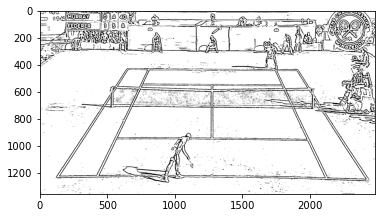

In [77]:
img = cv2.imread('tn1.png',0)
img = cv2.medianBlur(img,9)
# ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
# th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
# titles = ['Original Image', 'Global Thresholding (v = 127)',
#          'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
# images = [img, th1, th2, th3]

# plt.figure(figsize=(20,10))
# for i in range(4):
#     plt.subplot(2,2,i+1)
#     plt.imshow(images[i],'gray')
#     plt.title(titles[i])
#     plt.xticks([]),plt.yticks([])
# plt.show()

plt.imshow(th3, 'gray')

# Contour with a simple threshold

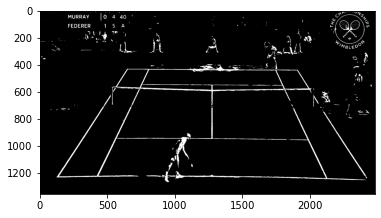

In [90]:
img_color = cv2.imread('tn1.png')
img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
ret, thresh1 = cv2.threshold(img_gray, 180, 255, cv2.THRESH_BINARY)
plt.imshow(thresh1, cmap='gray')

In [91]:
thresh1.shape

(1354, 2478)

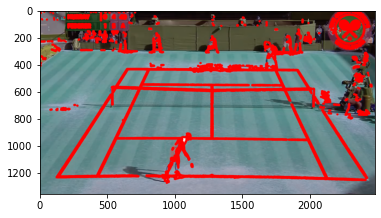

In [92]:
contours, hierarchy = cv2.findContours(thresh1, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

for cnt in contours:
    cv2.drawContours(img_color, [cnt], 0, (255, 0, 0), 15)  # blue

plt.imshow(img_color )

In [85]:
mask = np.zeros(img_gray.shape,np.uint8)

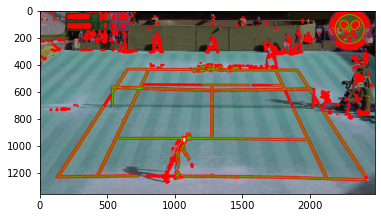

In [103]:
contours, hierarchy = cv2.findContours(thresh1, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

for cnt in contours:
#     print(cv2.contourArea(cnt))
    if cv2.contourArea(cnt) >10000:
        cv2.drawContours(img_color,[cnt],0,(0,255,0),2)
        cv2.drawContours(mask,[cnt],0,255,10)
        
plt.imshow(img_color)


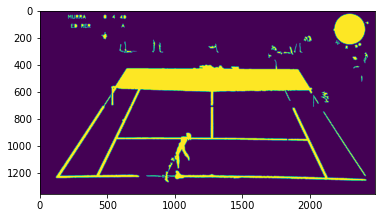

In [101]:
plt.imshow(mask)

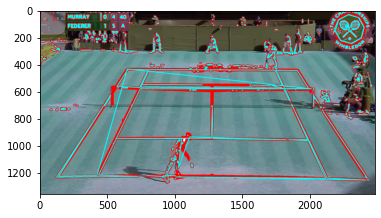

In [70]:
for cnt in contours:
    epsilon = 0.02 * cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, epsilon, True)
    cv2.drawContours(img_color,[approx],0,(0,255,255),5)

plt.imshow(img_color)

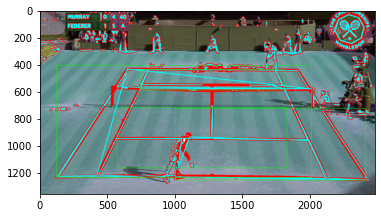

In [72]:
copy1 = img_color.copy()
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    if w > 500:
        cv2.rectangle(copy1, (x, y), (x + w, y + h), (0, 255, 0), 2)

plt.imshow(copy1)